# Week 11: Network Visualisation

Once your model has been created, you will need to visualise your work to your audiences. This week we will look into how to visualise network. 

## Drill

## Terminologies of Network

Network is a visual representation of linked objects. An example of network is shown in below: 

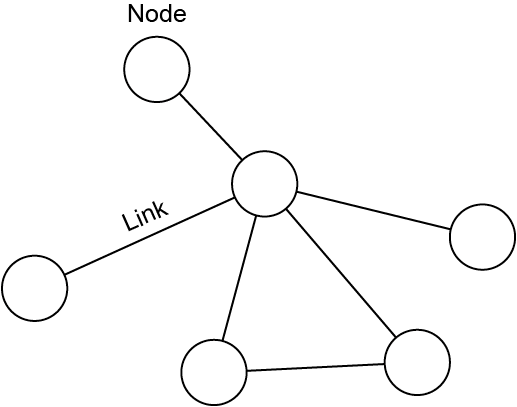

In [1]:
from IPython.display import Image
Image("fig/Network.png")

Network is composed of __nodes__ and connected by __links__ (sometimes called __edges__ from graph theory). For example, 
* A person represents a node
* Relationships link each person

__Exercise:__ What would be nodes or links/ edges in the following situation? 
* During an epidemic. 
* Your friends and aquaintances on social media. 
* Organisation chart. 
* Genetic interations of E Coli. 
* Traffic flow of Sydney.

__Solution__

| __Question__ | __Node__ | __Link__              |
|--------------|----------|-----------------------|
| 1            | Person   | Interactions          |
| 2            | Person   | Relationships         |
| 3            | Staff    | Work relationships    |
| 4            | Operons  | Transcription factors |
| 5            | Place    | Road/ rail/ air link  |

We can also make variants to network links by adding weights into them. This is presented as numerical labels into the links. 

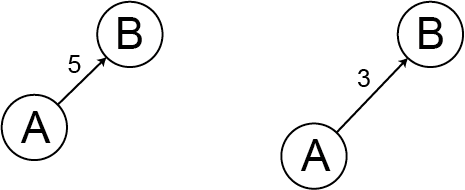

In [3]:
from IPython.display import Image
Image("fig/NetworkWeight.png")

As you can see from the figure above, the left edge is heavier than the right edge. Weights are important when we would like to characterise the interactions and compare them. For example, it can mean how significant is our relationships compared to our other friends. 

### Network Types: Undirected, Directed, Multigraph

Links can be tailored to represent different types of relationships. For example, one way roads is represented as an arrow from onw node to another, but the opposite direction. This is a __directed graph__. The type of networks where its links does not have a direction are called __undirected__ graphs. These link represents the interactions are bidirectional. 

There is a type of network called multigraph, which means there are not only one way to link from a node to another. For example, from you can either walk or take a bus to university. Each modes of transport are represented by one link. 

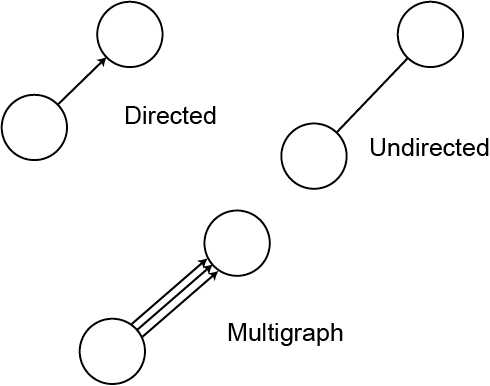

In [2]:
from IPython.display import Image
Image("fig/NetworkType.png")

__Exercise:__ Give examples if the following situations could be modelled as directed, multigraph or undirected networks?

* Local road traffic network
* State highway traffic network
* Social relationships

__Solution__

| __Question__ | __Situation__                   | __Link__              |
|--------------|---------------------------------|-----------------------|
| 1            | Local road traffic network      | Directed              |
| 2            | State highway traffic network   | Undirected            |
| 3            | Social relationships            | Undirected            |

### Network Science Quantities and Metrics

A network is complex in its topologies. So at its first glance it is not intuitive to describe a network quantitatively. Fortunately, network science has brought in many ideas from graph theory (from mathematics). The following summarises the quantative features from graph theory: 
* __Degree__ The number of links connected to a node. 
* __Distance__ We treat each link has length $1$. 
* __Diameter__ This is the longest shortest path from a node to another in one network/ graph. 
* __Complete graph__ All nodes are directly linked one another. 
* __Path__ All viable sequences between two nodes. For example, between nodes $A$ and $B$ is node $C$. So the paths between nodes $A$ and $B$ are $A\;-\;B$, $B\;-\;C$ and $A\;-\;C$. 
* __Cycle__ A composite path that will run back to the same node without other nodes bypassed twice (or more). 

These basic measurements are important to further infer from the network. Furthermore, we can interpolate more social aspects of network. For example, __homophily__ and __weak ties__ shows how close the people (nodes) are located. Homophily means the similarlity between people. Weak ties often describes two acquaintences, it is important because in reality we met much more acquaintences than close friends and family members. Acquaintences are very helpful in resource refer or sharing and this is one of the topic of the connections between social science and network science. We can also identify __communities__ with a social network. Communities are a group of people whom they share resources and membership of the same. In network science, we develop several metrics to infer these qualitative ideas. For example, 

* __Closeness__ This is to measure how near are all nodes. For example, if all nodes are directly linked, the network is obviously closed together. 
* __Betweenness__ Imagine the links have flow inside them. This measures how often the link is occupied by measure the number of shortest paths passing through the link. 
* __Assortativity__ This is to find out if people are prefered to attached to others. This metric measures the degrees of each node and measure how they correlated with their neighbours. 
* __PageRank__ Famous for the ranking search results by Google. One intuition is that imagine a person randomly pass through different pages, linked by hyperlinks. The page's popularity is measured by how many in-links to the page itself. 


So let us start coding with network using `NetworkX` in below. 

## NetworkX

NetworkX is a Python popular package in visualising and analysing data. To initiate the network analysis using NetworkX, we use 
```python
import networkx as nx
```
When analysing networks, it is best to visualise them. To do so, we can use `matplotlib` to plot the network. This is done by 
```python
from matlibplot import pyplot as plt
%matplotlib inline 
```

### Generating Networks

In Python, networks are its own data type. We start using `networkx` by creating the network object. This can be done by 
```python 
# Undirected graph
undirected_graph = nx.Graph()

# Directed graph
directed_graph = nx.DiGraph()

# Multigraph
multi_graph = nx.MultiGraph()
multi_digraph = nx.MultiDiGraph()
```

The empty bracket does not need to be blank. Rather, we can fill in the nodes and edges in the bracket. For example, if node $1$ is linked with node $2$. Then we write 
```python
g = nx.Graph([(1,2)])
```
Where `g` is a conventional name for graphs when we coding in Python. 

If we have created the network already. That is fine, we can still add the edges by 
```python
# Network `g` has created.
g.add_nodes_from([(1,2)])
```

If the network has more than one links, we input multiple tuples as additional edges. For example, nodes $1$ are linked with nodes $3$ and $4$. So we write 
```python
# Using the same example
# Create network from scratch
g = nx.Graph([(1,2), (1,3), (1,4)])
```

```python
# Using the same example
# Add new links
g.add_nodes_from([(1,3), (1,4)])
```

Of course, `networkx` has `Graph.add_node()` and `Graph.add_nodes_from([(u1,v1),(u2,v2)])` methods to add the nodes without connecting with the network. 

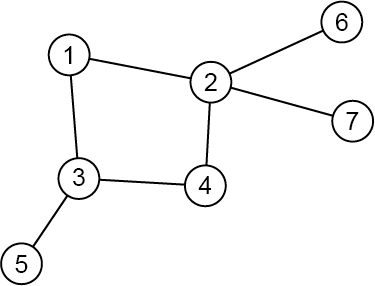

In [1]:
from IPython.display import Image
Image("fig/Network_Create.png")

__Exercise:__ Write a code that create a network as shown in the figure above. 

In [ ]:
# Solution
import networkx as nx

g = nx.Graph([(1,2),(1,3),(2,4),(3,4),(3,5),(2,6),(2,7)])

In [ ]:
# Your code 
import networkx as nx

g = 

Let's dig deep into a network object. If we simply print the `g` as in below, we can see that it is a `Graph` object. 

In [5]:
import networkx as nx

g = nx.Graph([(1,2),(1,3),(2,4),(3,4),(3,5),(2,6),(2,7)])

g

So let's look at what is inside there by printing the contents within `g`. 

In [6]:
import networkx as nx

g = nx.Graph([(1,2),(1,3),(2,4),(3,4),(3,5),(2,6),(2,7)])

g.__dict__

{'node_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}},
 '_adj': {1: {2: {}, 3: {}},
  2: {1: {}, 4: {}, 6: {}, 7: {}},
  3: {1: {}, 4: {}, 5: {}},
  4: {2: {}, 3: {}},
  5: {3: {}},
  6: {2: {}},
  7: {2: {}}}}

You should see there is a dictionary printing the information of `g`. In particular: 
* `'_node'` represents what are the nodes inside `g`
* `'_adj'`  prints the neighbours of each nodes connected to. 

These information are very useful in inferring networks. We will do some exercises later using these. 

### Visualising Networks

With the help of `matplotlib`, we can visualise networks easily. This is done by the network methods in `networkx`. In particular, 
```python
g = nx.Graph([(1,2), (2,3), (1,3)])
nx.draw(g)
```

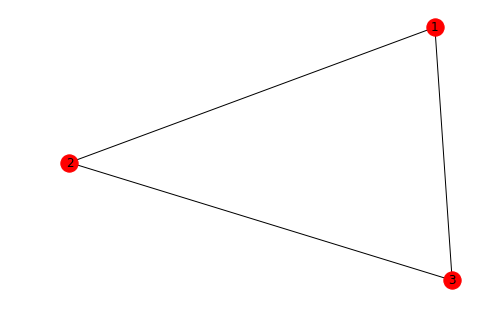

In [10]:
# Try me
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

g = nx.Graph([(1,2), (2,3), (1,3)])
nx.draw(g, with_labels=True)

__Exercise:__ Write a code that will visualise the given network `sample_network`. 

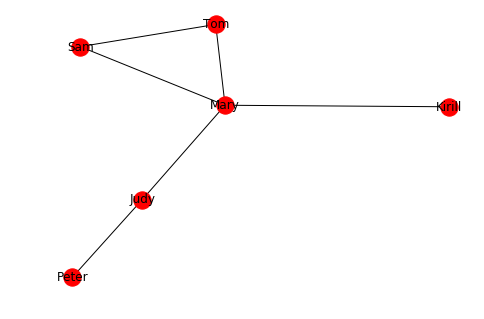

In [14]:
# Solution 

# Libraries
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

# Import data
from files.sample_network import g as sample_network

nx.draw(sample_network, with_labels=True)

In [ ]:
# Libraries
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

# Import data
from files.sample_network import g as sample_network

# Your code below



__Exercise:__ After you have visualised `sample_network`. Write code to answer the following questions: 
* How many nodes are there?
* What are the degrees for each node?
* Which nodes are singletons (i.e. nodes with $1$ degree)

In [20]:
# Solution

## Number of nodes
print('There are {} nodes. '.format(len(sample_network.nodes)))

## Degree
print('Degree distribution: {} '.format(sample_network.degree))

## Number of singletons 
number_of_singletons = 0

for degree_info in sample_network.degree: 
    if degree_info[1] == 1: 
        number_of_singletons += 1
print('There are {} singleton(s).'.format(number_of_singletons))

There are 6 nodes. 
Degree distribution: [('Mary', 4), ('Sam', 2), ('Judy', 2), ('Tom', 2), ('Kirill', 1), ('Peter', 1)] 
There are 2 singleton(s).


In [ ]:
# Your code below


## Import Instances

## EDA on Network Data